In [1]:
import pandas as pd
df = pd.read_csv('./dataset/패션아이템/morpheme-result_Okt.csv',
                 names=['TEXT'])
df

,TEXT
0,나이키 배색 집업후 리스 봉봉 빈티 제품 나이키 배색 집업후 리스 가격 사이즈 길이...
1,어 커버 하프 집업후 리스 원래 양털 아우 터 어쩌다가 어 커버 집업 사 할인 거기...
2,남미 배낭여행 볼리비아 라파즈 데스 로드 킬리킬리 야경 라파즈 시간 반의 이동 후 ...
3,스윗 서브 후리 스반 집업 후드 뽀글이 양털 후드 티 털 것 상품 스윗 서브 후리 ...
4,터틀 울 골지 원피스 니트 세트 면 초 베스트 상품 보기 무배 폴라 기모 배색 프릴...
...,...
95864,핫딜 블랙 야크 집업 티셔츠 주황 주문 링크
95865,핫딜 제이 디 엑스 여성 이중 에리 집업 티셔츠 네이비 주문 링크
95866,핫딜 제이 디 엑스 여성 이중 에리 집업 티셔츠 블랙 할인 주문 링크
95867,남성 폴로 면 집업 니트 레드 라지 기준 여유


In [2]:
df['TEXT']

0        나이키 배색 집업후 리스 봉봉 빈티 제품 나이키 배색 집업후 리스 가격 사이즈 길이...
1        어 커버 하프 집업후 리스 원래 양털 아우 터 어쩌다가 어 커버 집업 사 할인 거기...
2        남미 배낭여행 볼리비아 라파즈 데스 로드 킬리킬리 야경 라파즈 시간 반의 이동 후 ...
3        스윗 서브 후리 스반 집업 후드 뽀글이 양털 후드 티 털 것 상품 스윗 서브 후리 ...
4        터틀 울 골지 원피스 니트 세트 면 초 베스트 상품 보기 무배 폴라 기모 배색 프릴...
                               ...                        
95864                            핫딜 블랙 야크 집업 티셔츠 주황 주문 링크 
95865                핫딜 제이 디 엑스 여성 이중 에리 집업 티셔츠 네이비 주문 링크 
95866              핫딜 제이 디 엑스 여성 이중 에리 집업 티셔츠 블랙 할인 주문 링크 
95867                           남성 폴로 면 집업 니트 레드 라지 기준 여유 
95868    쇼지 첼시 핫딜 디스커버리 집업 기모 하이 넥 티 정가 그레이 블랙 기모 따땃 링크...
Name: TEXT, Length: 95869, dtype: object

In [3]:
texts = df['TEXT'].values.tolist()
print(texts[0])

나이키 배색 집업후 리스 봉봉 빈티 제품 나이키 배색 집업후 리스 가격 사이즈 길이 센치 어깨 단면 센치 가슴 단면 센치 제품 설명 컨디션 세탁 완료 


In [4]:
from krwordrank.hangle import normalize

texts = [normalize(str(text), english=True, number=True) for text in texts]

In [5]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count=5,  # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length=10,  # 단어의 최대 길이
    verbose=True
)

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 19970
done = 10 Early stopped.


In [6]:
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

      집업:	232.9376
     사이즈:	104.0158
      판매:	98.6522
      가격:	70.2032
      상품:	66.0454
      하프:	65.4424
      거래:	62.2094
      제품:	60.8367
      후드:	57.2387
      장터:	50.2001
     나이키:	45.4635
      니트:	44.8479
      번개:	44.2312
     티셔츠:	43.4935
      자켓:	43.0986
      남성:	35.9679
      블랙:	30.8693
      연락:	26.8227
    바람막이:	26.3800
      개인:	26.1076
      여성:	25.7131
      상태:	23.9340
      폴로:	22.8681
      골프:	22.2720
      완료:	21.5061
      리스:	20.8894
      가슴:	18.1128
      패딩:	17.6965
      송금:	17.4137
     브랜드:	17.2811


In [7]:
stopwords = {}
passwords = {word: score for word, score in sorted(
    keywords.items(), key=lambda x: -x[1])[:300] if not (word in stopwords)}

In [8]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(
    texts, min_count=5, max_length=10, beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts)  # with default arguments

scan vocabs ... 
num vocabs = 19970
done = 10 Early stopped.


In [9]:
from wordcloud import WordCloud

# Set your font path
font_path = 'YOUR_FONT_DIR/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

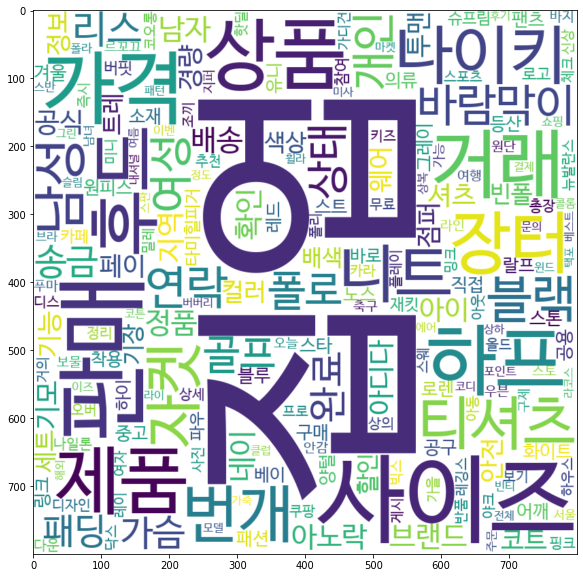

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [11]:
# fig.savefig('./result_img/11_Okt-2-KRWordRank_[ZIPUP].png')